# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm
!pip install gensim

  Using cached pydantic-2.10.5-py3-none-any.whl.metadata (30 kB)
  Using cached pydantic_core-2.27.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.6 kB)
Using cached pydantic-2.10.5-py3-none-any.whl (431 kB)
Using cached pydantic_core-2.27.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.0 MB)
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.33.2
    Uninstalling pydantic_core-2.33.2:
      Successfully uninstalled pydantic_core-2.33.2
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.11.7
    Uninstalling pydantic-2.11.7:
      Successfully uninstalled pydantic-2.11.7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 126.3 MB/s eta 0:00:00
  Attempting uninstall: en-core-web-sm
    Found existing installation: en_core_web_sm 3.8.0
    Uninstalling en_core_web_sm-3.8.0:
      Successfully uninstalled en_core_web_sm-3.8.0
✔ Download and installation successful
You can now loa

## Importing the necessary libraries

In [5]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [4]:
## Change the display properties of pandas to max
#pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [34]:
# Import the first file - True.csv
true_news_df = pd.read_csv("True.csv")
# Import the second file - Fake.csv
fake_news_df = pd.read_csv("Fake.csv")

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [35]:
# Inspect the DataFrame with True News to understand the given data
print("True News Data Size:", true_news_df.shape)
print("\n")
print("True News Data Index:", true_news_df.index)
print("\n")
print("True News Data Info:", true_news_df.info())

True News Data Size: (21417, 3)


True News Data Index: RangeIndex(start=0, stop=21417, step=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB
True News Data Info: None


In [36]:
# Inspect the DataFrame with Fake News to understand the given data
print("Fake News Data Size:", fake_news_df.shape)
print("\n")
print("Fake News Data Index:", fake_news_df.index)
print("\n")
print("Fake News Data Info:", fake_news_df.info())
print("\n")

Fake News Data Size: (23523, 3)


Fake News Data Index: RangeIndex(start=0, stop=23523, step=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB
Fake News Data Info: None




In [37]:
# Print the column details for True News DataFrame
print("True News Data Columns:", true_news_df.columns)

True News Data Columns: Index(['title', 'text', 'date'], dtype='object')


In [38]:
# Print the column details for Fake News Dataframe
print("Fake News Data Columns:", fake_news_df.columns)

Fake News Data Columns: Index(['title', 'text', 'date'], dtype='object')


In [39]:
# Print the column names of both DataFrames
print("True News Data Columns:\n", list(true_news_df.columns))
print("\nFake News Data Columns:\n", list(fake_news_df.columns))

True News Data Columns:
 ['title', 'text', 'date']

Fake News Data Columns:
 ['title', 'text', 'date']


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [40]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_news_df['news_label'] = 1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_news_df['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [41]:
# Combine the true and fake news DataFrames into a single DataFrame
merged_news_df = pd.concat([true_news_df, fake_news_df], axis = 0, ignore_index=True)
print("Merged Data Size: ", merged_news_df.shape)

Merged Data Size:  (44940, 4)


In [42]:
# Display the first 5 rows of the combined DataFrame to verify the result
merged_news_df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  \
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017    
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017    
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017    
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017    
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017    

   news_label  
0           1  
1           1  
2           1  
3           1  
4           1

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [43]:
# Check Presence of Null Values
null_summary = pd.DataFrame({
    'Null Count': merged_news_df.isnull().sum(),
    'Null Percentage': (merged_news_df.isnull().sum() / len(merged_news_df)) * 100
})

print(null_summary)

            Null Count  Null Percentage
title               21         0.046729
text                21         0.046729
date                42         0.093458
news_label           0         0.000000


In [44]:
# Handle Rows with Null Values
merged_news_df.dropna(inplace=True)
print("Merged data size after dropping null values: ", merged_news_df.shape)

Merged data size after dropping null values:  (44898, 4)


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [45]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
combined_df = merged_news_df.copy()
combined_df['news_text'] = merged_news_df['title'] + ' ' + merged_news_df['text']
# Drop the irrelevant columns from the DataFrame as they are no longer needed
combined_df.drop(['title', 'text', 'date'], axis=1, inplace=True)
# Display the first 5 rows of the updated DataFrame to check the result
combined_df.head(5)

news_label                                          news_text
0           1  As U.S. budget fight looms, Republicans flip t...
1           1  U.S. military to accept transgender recruits o...
2           1  Senior U.S. Republican senator: 'Let Mr. Muell...
3           1  FBI Russia probe helped by Australian diplomat...
4           1  Trump wants Postal Service to charge 'much mor...

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [46]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = combined_df.copy()

# Add 'news_label' column to the new dataframe for topic identification

df_clean.head()

news_label                                          news_text
0           1  As U.S. budget fight looms, Republicans flip t...
1           1  U.S. military to accept transgender recruits o...
2           1  Senior U.S. Republican senator: 'Let Mr. Muell...
3           1  FBI Russia probe helped by Australian diplomat...
4           1  Trump wants Postal Service to charge 'much mor...

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [47]:
# Write the function here to clean the text and remove all the unnecessary elements
def clean_text(text):
# Convert to lower case
    text = text.lower()
# Remove text in square brackets
    text = re.sub('\[.*?\]', '', text)
# Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
# Remove words with numbers
    text = re.sub('\w*\d\w*', '', text)
    return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [48]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['news_text_cleaned'] = df_clean['news_text'].apply(clean_text)
df_clean.drop(['news_text'], axis=1, inplace=True)
df_clean.head()

news_label                                  news_text_cleaned
0           1  as us budget fight looms republicans flip thei...
1           1  us military to accept transgender recruits on ...
2           1  senior us republican senator let mr mueller do...
3           1  fbi russia probe helped by australian diplomat...
4           1  trump wants postal service to charge much more...

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [49]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
def remove_stopwords(doc):
      return [token for token in doc if not token.is_stop]

def filter_noun(doc):
      return [token for token in doc if token.pos_ in ['NOUN'] ]

def filter_pos(doc):
      doc = remove_stopwords(doc)
      doc = filter_noun(doc)
      return doc

def lemmatize(doc):
      return [token.lemma_ for token in doc]

def join_tokens(tokens):
    return " ".join(tokens)

def pos_tagging_lemmatization(doc):
      doc = nlp(doc)
      doc = filter_pos(doc)
      lemma = lemmatize(doc)
      cleaned_text = join_tokens(lemma)
      return cleaned_text

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [50]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
df_clean['news_text_lemmatized'] = df_clean['news_text_cleaned'].apply(pos_tagging_lemmatization)

### Save the Cleaned data as a csv file (Recommended)

In [6]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [7]:
# Check the first few rows of the DataFrame
df_clean.head(3)

news_label                                  news_text_cleaned  \
0           1  as us budget fight looms republicans flip thei...   
1           1  us military to accept transgender recruits on ...   
2           1  senior us republican senator let mr mueller do...   

                                news_text_lemmatized  
0  budget fight script head faction month expansi...  
1  military transgender recruit people time milit...  
2  job counsel investigation link trump election ...

In [8]:
# Check the dimensions of the DataFrame
df_clean.shape

(44898, 3)

In [9]:
# Check the number of non-null entries and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   news_label            44898 non-null  int64 
 1   news_text_cleaned     44898 non-null  object
 2   news_text_lemmatized  44875 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [10]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split

x = df_clean['news_text_lemmatized']
y = df_clean['news_label']

X_train, X_val, y_train, y_val = train_test_split(
    x, y, test_size=0.3, random_state=42, stratify=y
)

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [11]:
# Add a new column to calculate the character length of cleaned news text
df_clean['news_text_cleaned_length'] = df_clean['news_text_cleaned'].apply(len)
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_clean['news_text_lemmatized_length'] = df_clean['news_text_lemmatized'].fillna('').apply(len)

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

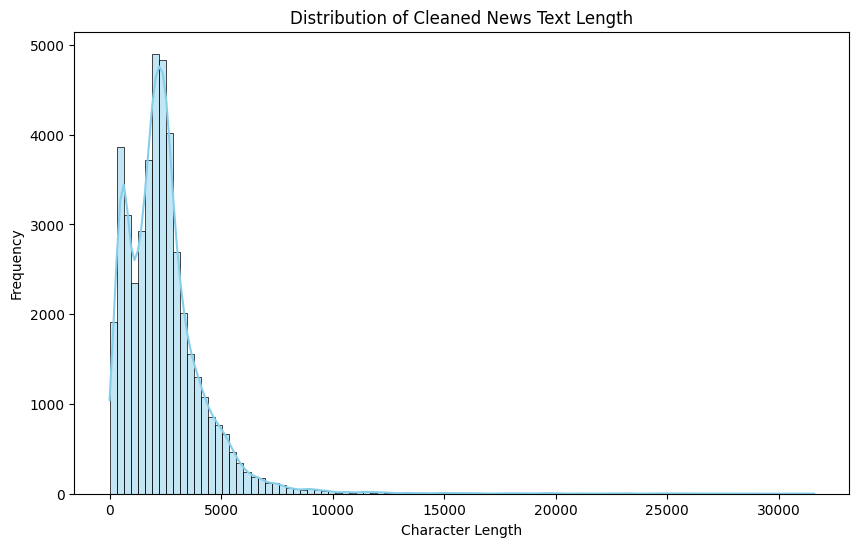

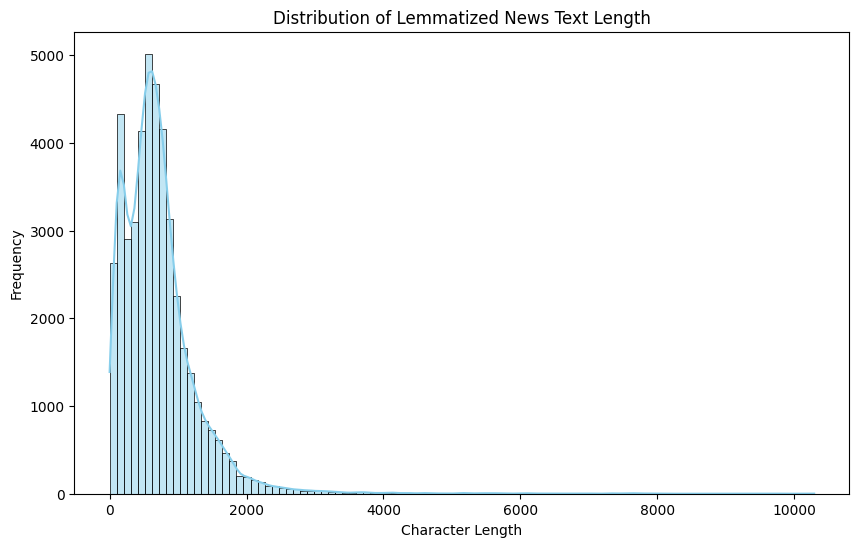

In [12]:
# Create a histogram plot to visualise character lengths
def plot_hist(df, column_name, title, x_label, y_label):
      plt.figure(figsize=(10, 6))
      sns.histplot(df[column_name], bins=100, kde=True, color='skyblue')
      plt.title(title)
      plt.xlabel(x_label)
      plt.ylabel(y_label)
      plt.show()

# Add histogram for cleaned news text
plot_hist(df_clean, 'news_text_cleaned_length', 'Distribution of Cleaned News Text Length', 'Character Length', 'Frequency')

# Add histogram for lemmatized news text with POS tags removed
plot_hist(df_clean, 'news_text_lemmatized_length', 'Distribution of Lemmatized News Text Length', 'Character Length', 'Frequency')

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [13]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from wordcloud import WordCloud

def generate_wordCloud(text):
      wordcloud = WordCloud(width=800, height=600,
                      max_words=40,
                      background_color='white',
                      colormap='viridis').generate(text)
      return wordcloud

def plot_wordCloud(wordcloud, title):
      plt.figure(figsize=(15, 7))
      plt.imshow(wordcloud, interpolation='bilinear')
      plt.axis('off')
      plt.title(title, fontsize=20)
      plt.show()

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news = X_train[y_train == 1].fillna('')
# Generate word cloud for True News
true_news_text = " ".join(true_news)
true_wordcloud = generate_wordCloud(true_news_text)
plot_wordCloud(true_wordcloud, 'Word Cloud for True News')

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [14]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news = X_train[y_train == 0].fillna('')
# Generate word cloud for Fake News
fake_news_text = " ".join(fake_news)
fake_wordcloud = generate_wordCloud(fake_news_text)
plot_wordCloud(fake_wordcloud, 'Word Cloud for Fake News')

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [15]:
# Write a function to get the specified top n-grams
def get_top_ngrams(data, ngram_range=(1, 1), top_n=20):

    data = data.dropna().astype(str).tolist()

    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(data)

    ngram_freq = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])
    sorted_ngrams = sorted(ngram_freq, key=lambda x: x[1], reverse=True)

    return sorted_ngrams[:top_n]

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [16]:
# Handle NaN values in the text data
df_clean['news_text_lemmatized'].dropna(inplace=True)
X_train = X_train.fillna('')
X_val = X_val.fillna('')

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

In [17]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
def print_n_grams(top_ngrams):
    for ngram, freq in top_ngrams:
        print(f"{ngram}: {freq}")

def plot_n_grams(top_ngrams, title, x_label, y_label):
    ngrams, freqs = zip(*top_ngrams)
    plt.figure(figsize=(10, 6))
    plt.bar(ngrams, freqs)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=80)
    plt.tight_layout()
    plt.show()

true_news = X_train[y_train == 1]

top_unigrams = get_top_ngrams(true_news, ngram_range=(1, 1), top_n=10)
print_n_grams(top_unigrams)
plot_n_grams(top_unigrams, 'Top 10 Unigrams in True News', 'Unigrams', 'Frequency')

trump: 31674
state: 14145
government: 13934
year: 13186
people: 10901
election: 9911
country: 9843
official: 9348
party: 8775
president: 8128


##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



trump campaign: 1532
trump administration: 1332
news conference: 950
security force: 721
request comment: 711
tax reform: 705
climate change: 685
percent percent: 685
house representative: 683
attorney general: 654


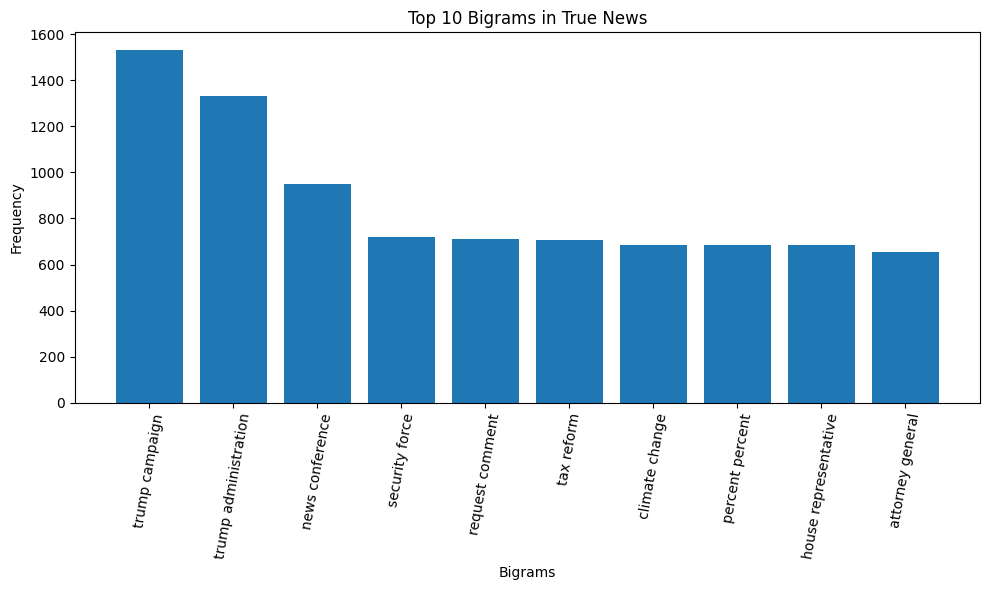

In [18]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top_bigrams = get_top_ngrams(true_news, ngram_range=(2, 2), top_n=10)
print_n_grams(top_bigrams)
plot_n_grams(top_bigrams, 'Top 10 Bigrams in True News', 'Bigrams', 'Frequency')

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



official condition anonymity: 242
trump transition team: 237
candidate donald trump: 206
tax rate percent: 154
trump travel ban: 129
article sap editorial: 122
editorial staff sap: 122
involvement creation production: 122
sap editorial staff: 122
sap involvement creation: 122


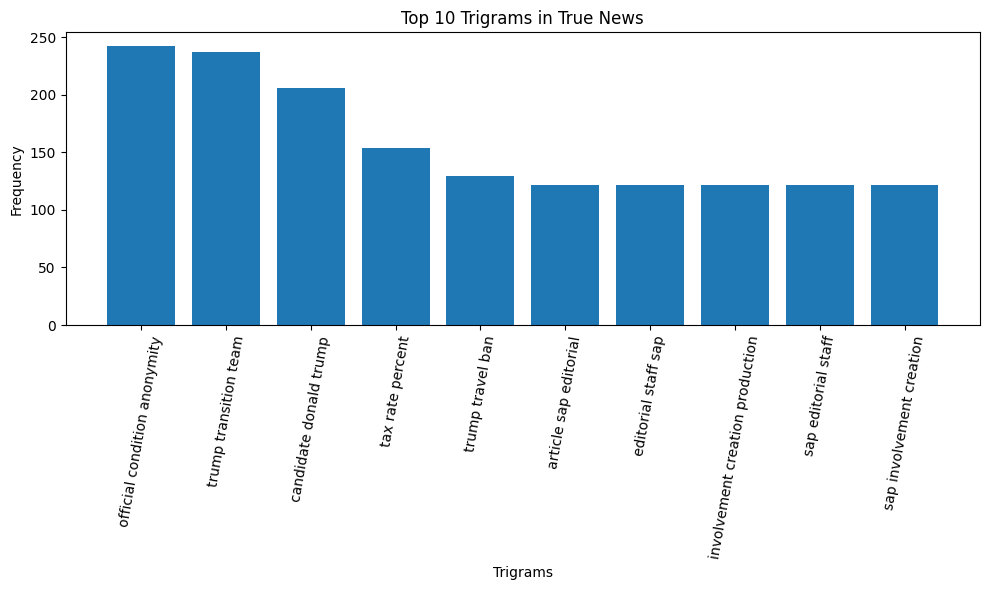

In [19]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
top_trigrams = get_top_ngrams(true_news, ngram_range=(3, 3), top_n=10)
print_n_grams(top_trigrams)
plot_n_grams(top_trigrams, 'Top 10 Trigrams in True News', 'Trigrams', 'Frequency')

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

trump: 41592
people: 18282
president: 11595
time: 11143
year: 10291
image: 9733
state: 8681
woman: 8380
video: 7980
campaign: 7702


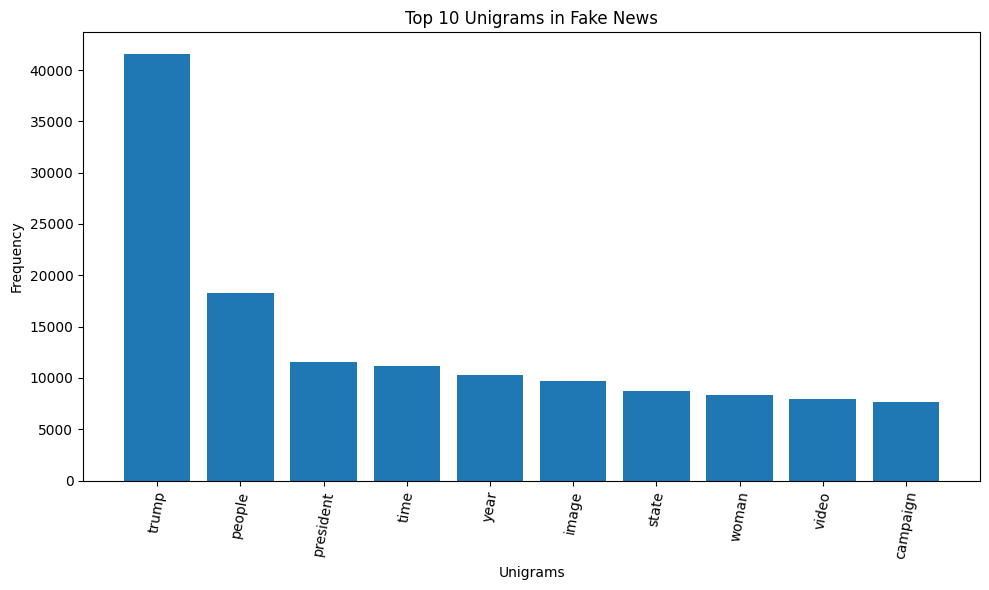

In [20]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
fake_news = X_train[y_train == 0]
top_unigrams = get_top_ngrams(fake_news, ngram_range=(1, 1), top_n=10)
print_n_grams(top_unigrams)
plot_n_grams(top_unigrams, 'Top 10 Unigrams in Fake News', 'Unigrams', 'Frequency')

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [21]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top_bigrams = get_top_ngrams(fake_news, ngram_range=(2, 2), top_n=10)
print_n_grams(top_bigrams)
plot_n_grams(top_bigrams, 'Top 10 Bigrams in Fake News', 'Bigrams', 'Frequency')

trump supporter: 1529
trump campaign: 1264
president trump: 1249
century wire: 1238
police officer: 1164
image image: 1086
law enforcement: 1069
donald trump: 975
screen capture: 925
climate change: 791


##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



video screen capture: 516
news century wire: 515
image video screen: 494
image getty image: 389
image screen capture: 308
century wire filessupport: 183
filessupport subscribe member: 179
image video screenshot: 165
law enforcement officer: 163
image chip image: 162


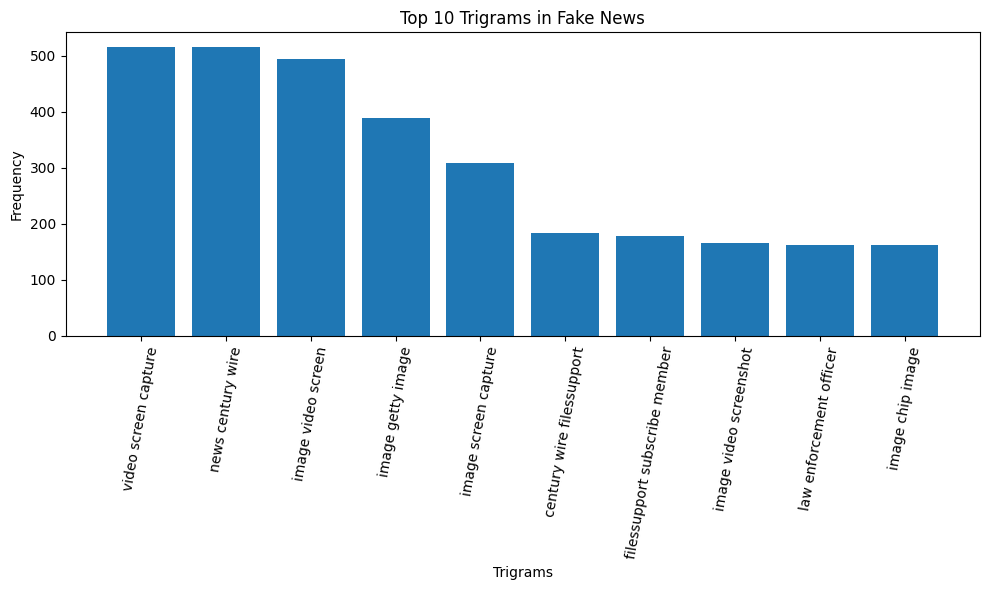

In [22]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top_trigrams = get_top_ngrams(fake_news, ngram_range=(3, 3), top_n=10)
print_n_grams(top_trigrams)
plot_n_grams(top_trigrams, 'Top 10 Trigrams in Fake News', 'Trigrams', 'Frequency')

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [ ]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [ ]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [2]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim
import gensim.downloader as api

model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [23]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
def document_vector(text, model):

    word_list = text.split()

    valid_word_vectors = []

    for word in word_list:
        if word in model:
            valid_word_vectors.append(model[word])

    if valid_word_vectors:
        document_avg_vector = np.mean(valid_word_vectors, axis=0) #Compute the average vector (document representation)
    else:
        document_avg_vector = np.zeros(model.vector_size) #If no known words, return a zero vector (all zeros)

    return document_avg_vector

X_train_vectors = np.array([document_vector(doc, model) for doc in X_train])
X_val_vectors = np.array([document_vector(doc, model) for doc in X_val])

## Extract the target variable for the training data and validation data
y_train_array = y_train.values
y_val_array = y_val.values

## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [25]:
## Initialise Logistic Regression model
logistic_model = LogisticRegression()
## Train Logistic Regression model on training data
logistic_model.fit(X_train_vectors, y_train_array)
## Predict on validation data
y_pred = logistic_model.predict(X_val_vectors)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [26]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
l_accuracy = accuracy_score(y_val_array, y_pred)
l_precision = precision_score(y_val_array, y_pred)
l_recal = recall_score(y_val_array, y_pred)
l_f1 = f1_score(y_val_array, y_pred)

print("LogisticRegression Accuracy:", l_accuracy)
print("LogisticRegression Precision:", l_precision)
print("LogisticRegression Recall:", l_recal)
print("LogisticRegression F1-score:", l_f1)

LogisticRegression Accuracy: 0.9056421677802524
LogisticRegression Precision: 0.8974398519432449
LogisticRegression Recall: 0.9056809338521401
LogisticRegression F1-score: 0.9015415601518321


In [27]:
# Classification Report
print(classification_report(y_val_array, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7045
           1       0.90      0.91      0.90      6425

    accuracy                           0.91     13470
   macro avg       0.91      0.91      0.91     13470
weighted avg       0.91      0.91      0.91     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [28]:
## Initialise Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
## Train Decision Tree model on training data
dt_model.fit(X_train_vectors, y_train_array)
## Predict on validation data
y_dt_pred = dt_model.predict(X_val_vectors)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [29]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
dt_accuracy = accuracy_score(y_val_array, y_dt_pred)
dt_precision = precision_score(y_val_array, y_dt_pred)
dt_recal = recall_score(y_val_array, y_dt_pred)
dt_f1 = f1_score(y_val_array, y_dt_pred)

print("DecisionTree Accuracy:", dt_accuracy)
print("DecisionTree Precision:", dt_precision)
print("DecisionTree Recall:", dt_recal)
print("DecisionTree F1-score:", dt_f1)

DecisionTree Accuracy: 0.8274684484038605
DecisionTree Precision: 0.8309927360774818
DecisionTree Recall: 0.8012451361867704
DecisionTree F1-score: 0.8158478605388273


In [30]:
# Classification Report
print(classification_report(y_val_array, y_dt_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      7045
           1       0.83      0.80      0.82      6425

    accuracy                           0.83     13470
   macro avg       0.83      0.83      0.83     13470
weighted avg       0.83      0.83      0.83     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [31]:
## Initialise Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
## Train Random Forest model on training data
rf_model.fit(X_train_vectors, y_train_array)
## Predict on validation data
y_rf_pred = rf_model.predict(X_val_vectors)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [32]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
rf_accuracy = accuracy_score(y_val_array, y_rf_pred)
rf_precision = precision_score(y_val_array, y_rf_pred)
rf_recal = recall_score(y_val_array, y_rf_pred)
rf_f1 = f1_score(y_val_array, y_rf_pred)

print("RandomForest Accuracy:", rf_accuracy)
print("RandomForest Precision:", rf_precision)
print("RandomForest Recall:", rf_recal)
print("RandomForest F1-score:", rf_f1)

RandomForest Accuracy: 0.9079435783221975
RandomForest Precision: 0.9117039860250913
RandomForest Recall: 0.8935408560311284
RandomForest F1-score: 0.9025310485772677


In [33]:
# Classification Report
print(classification_report(y_val_array, y_rf_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7045
           1       0.91      0.89      0.90      6425

    accuracy                           0.91     13470
   macro avg       0.91      0.91      0.91     13470
weighted avg       0.91      0.91      0.91     13470



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

**Distribution of Cleaned vs Lemmatized Text:** Most articles falls between 1000-5000 characters range which has been reduced to 300-1500 characters after lemmatization. After lemmatization text becomes more standardized and concise, improving semantic consistency for feature extraction.

**Patterns in True vs. Fake News:**

Through exploratory data analysis, we observed that fake news articles often rely on emotionally charged or sensational keywords, while true news articles maintain a more factual and neutral tone. This highlights the importance of capturing semantic meaning rather than just syntactic features.

**Best Performing Model:**

Among the models trained — including Logistic Regression, Decision Tree, and Random Forest — the Random Forest model yielded the best overall performance in terms of accuracy, precision, recall, and F1-score. This suggests its robustness in handling high-dimensional Word2Vec features and nonlinear patterns in text data.

**Evaluation Metric Prioritized:**

In the context of fake news detection, F1-score was prioritized as the key metric because it balances precision (how many predicted fake/true labels were correct) and recall (how many actual fake/true news were captured). A high F1-score indicates that the model is effective at minimizing both false positives and false negatives, which is critical in mitigating misinformation.